In [1]:
import matplotlib.pyplot as plt 
from astropy.io import fits

In [2]:
hdul = fits.open('sfh_2000_10_20250818_152758.fits')
hdul.info()

Filename: sfh_2000_10_20250818_152758.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   2000R x 2C   [10D, 4334D]   
  2  WAVELENGTHS    1 ImageHDU         7   (4334,)   float64   


In [3]:
data = hdul[1].data
wav = hdul[2].data

n = 1
spec = data[n][1]
sfh = data[n][0]

[0.14557538 0.12536848 0.05478287 0.13102743 0.11324979 0.10320652
 0.04459633 0.08551246 0.12987711 0.06680363]


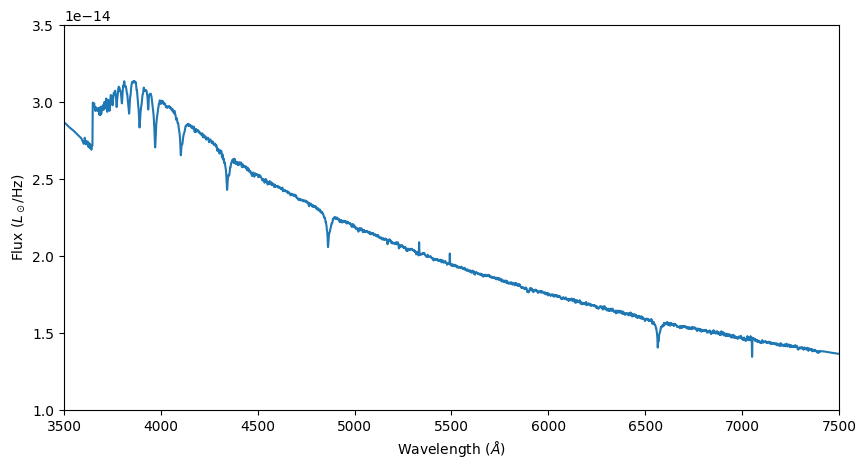

In [4]:
plt.figure(figsize=[10,5])
plt.plot(wav, spec)
plt.xlim(3500,7500)
plt.ylim(1e-14,3.5e-14)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux ($L_\odot/\\text{Hz}$)')

print(sfh)